# **Laboratorio 5**

Ventanas, comportamiento en frecuencia 

Señales no estacionarias

STFT, espectrograma


## Librerías necesarias

instalamos la librerías y sublibrerías necesarias para toda la notebook

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal #para convolución lineal
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav

## Ejercicio 1: Ventanas

Considere las ventanas rectangular, Barlett, Hamming, Parzen y Blackman  con longitudes L = 33 y 99.


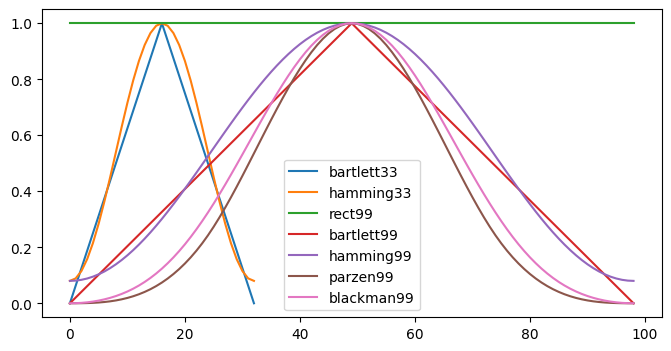

In [143]:
w1 = np.ones(33) #rectangular hola super gay 
w2 = signal.bartlett(33)
w3=  signal.hamming(33)
w4 = signal.parzen(33) 
w5 = signal.blackman(33)

w1g = np.ones(99) #rectangular
w2g = signal.bartlett(99)
w3g = signal.hamming(99)
w4g = signal.parzen(99) 
w5g = signal.blackman(99)

m = np.arange(33) #para el eje de las abscisas, vector con nros de muestras
mg = np.arange(99) #para el eje de las abscisas, vector con nros de muestras

plt.figure(figsize=(8, 4))
plt.plot(m,w2, m,w3)
plt.plot(mg,w1g,mg,w2g, mg,w3g, mg,w4g,mg, w5g)
plt.legend(('bartlett33','hamming33','rect99','bartlett99','hamming99','parzen99', 'blackman99'))
plt.show()

## Ejercicio 2: análisis en frec vent

a) Calcule p/c/u su transformada de Fourier punto N=256 y represente su módulo en dB. 

Compare resultados de distintas ventanas de la misma longitud. Incluya varias
representaciones en el mismo gráfico. Qué comentarios puede hacer?

In [144]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 33, y luego solo las centramos
#para ubicar los resultados de las frecuencias bajas en el centro
N=512
W1=fft(w1,N) # transformada, señal compleja
W2=fft(w2,N) 
W3=fft(w3,N) 
W4=fft(w4,N) 
W5=fft(w5,N) 

W1c=fftshift(W1) #fftshift solo centra,
W2c=fftshift(W2)
W3c=fftshift(W3)
W4c=fftshift(W4)
W5c=fftshift(W5)

In [145]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 99, y luego solo las centramos
N=512
W1g=fft(w1g,N) # transformada, señal compleja
W2g=fft(w2g,N) 
W3g=fft(w3g,N) 
W4g=fft(w4g,N) 
W5g=fft(w5g,N) 

W1gc=fftshift(W1g) #fftshift solo centra,
W2gc=fftshift(W2g)
W3gc=fftshift(W3g)
W4gc=fftshift(W4g)
W5gc=fftshift(W5g)

In [146]:
#Vectores de frecuencias, para 
k=np.arange(0,N) #frec fundamentales de la DFT, de 0 a N-1, en [0,N), #k ocilaciones en N muestras, con k de 0 a N-1 
kc=np.arange(-N/2,N/2) # ahora centrada, para cuando se usa fftshift para la transformada

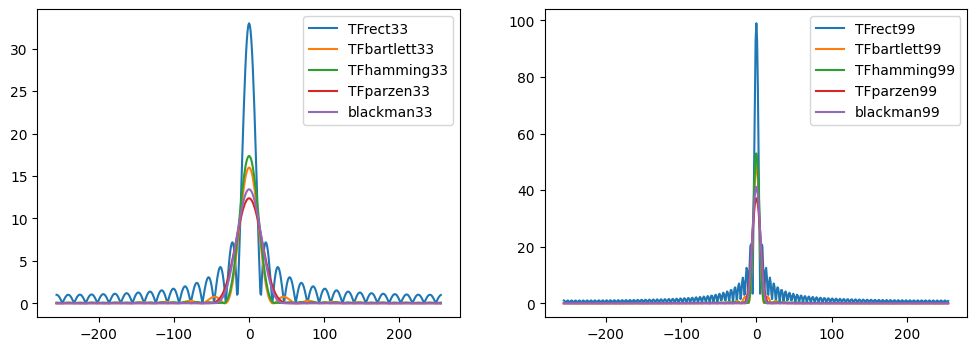

In [147]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W2c),kc,abs(W3c),kc,abs(W4c),kc,abs(W5c))
plt.legend(('TFrect33','TFbartlett33','TFhamming33','TFparzen33', 'blackman33'))
plt.subplot(122)
plt.plot(kc,abs(W1gc),kc,abs(W2gc),kc,abs(W3gc),kc,abs(W4gc),kc,abs(W5gc))
plt.legend(('TFrect99','TFbartlett99','TFhamming99','TFparzen99', 'blackman99'))
plt.show()

Tener en cuenta el principio de incerteza. Si el 𝚫t se agranda el Δw se achica para mantener la igualdad. Ídem al revés.

b) Compare resultados de la misma ventana para las dos longitudes. Incluya los dos resultados en el mismo gráfico. Qué comentarios puede hacer?

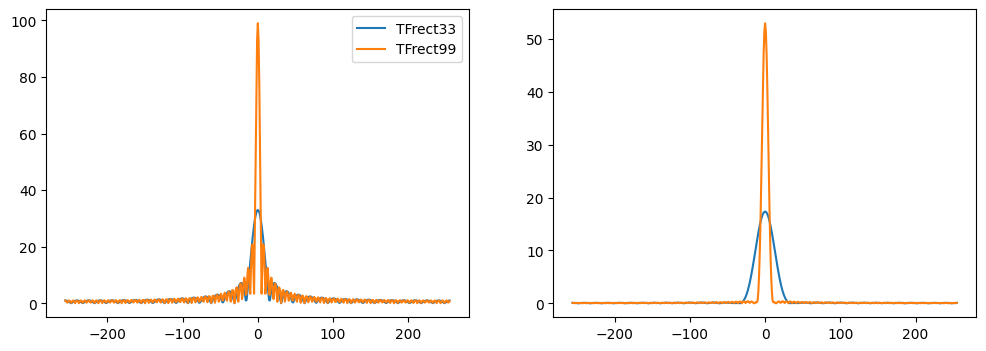

In [148]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W1gc))
plt.legend(('TFrect33','TFrect99'))
plt.subplot(122)
plt.plot(kc,abs(W3c),kc,abs(W3gc))

#buena resolucion en el tiempo delta de t más chiquito
plt.show()

### c) ancho de banda a 3 dB
para cada una Calcule el ancho de banda a 3 dB.
Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

In [149]:
#Primero calculamos el módulo en dB de cada ventana.
W1dB=20*np.log10(1+abs(W1c))
W2dB=20*np.log10(1+abs(W2c))
W3dB=20*np.log10(1+abs(W3c))
W4dB=20*np.log10(1+abs(W4c))
W5dB=20*np.log10(1+abs(W5c))

W1gdB=20*np.log10(1+abs(W1gc))
W2gdB=20*np.log10(1+abs(W2gc))
W3gdB=20*np.log10(1+abs(W3gc))
W4gdB=20*np.log10(1+abs(W4gc))
W5gdB=20*np.log10(1+abs(W5gc))

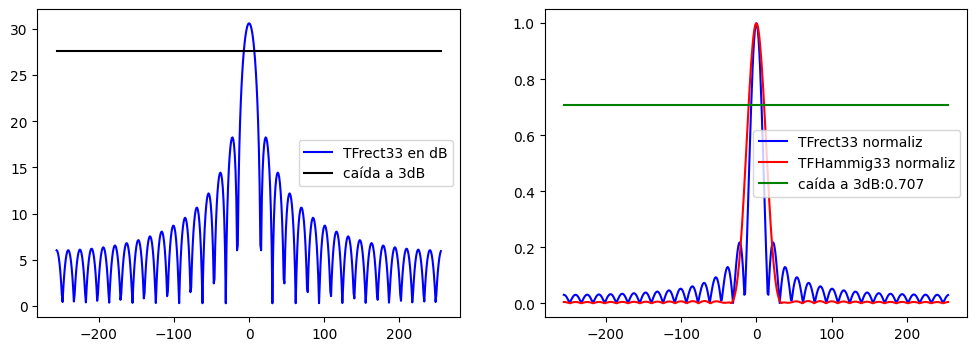

máx en dB de rect: 30.629578340845104
máx en dB de rect-3dB: 27.629578340845104


In [150]:
#caida en dB gráficamente para  la ventana rectangular long 33:
m3dBr=(np.max(W1dB)-3)*np.ones(512)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,W1dB,'b',kc,m3dBr,'black')
plt.legend(('TFrect33 en dB','caída a 3dB'))

W1N=abs(W1c/np.max(W1c)) #transformada(centrada)de rect, ahora normalizada, 
W3N=abs(W3c/np.max(W3c)) #transformada(centrada) de Hamming, ahora normalizada,
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707, para ambos
m3dBn=(0.707)*np.ones(512) 
plt.subplot(122)
plt.plot(kc,W1N,'b',kc,W3N,'r', kc,m3dBn,'g')
plt.legend(('TFrect33 normaliz','TFHammig33 normaliz','caída a 3dB:0.707'))


plt.show()
print('máx en dB de rect:', np.max(W1dB))
print('máx en dB de rect-3dB:', np.max(W1dB)-3)

Para todas las normalizadas:
El máximo pasa a ser 1 y la caida a 3 decibeles a 0,707 (para todas)

13 es la cant de muestras donde supera la caida a 3dB la rect
21 es la cant de muestras donde supera la caida a 3dB la Hamming


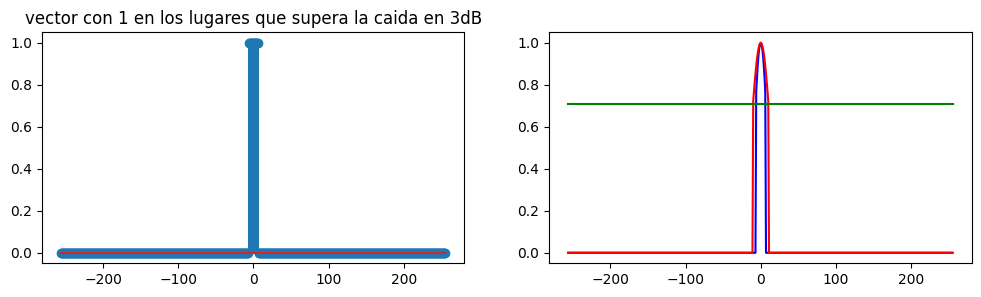

In [151]:
#Cálculo
#1ero se normaliza las transformadas (sin pasar a decibeles)
#Ventana rectangular: W1N=abs(W1c/np.max(W1c)) #transformada(centrada), ahora normalizada, 
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707
lugares1= (W1N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W1N>0.707), 'es la cant de muestras donde supera la caida a 3dB la rect')
lugares3= (W3N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W3N>0.707), 'es la cant de muestras donde supera la caida a 3dB la Hamming')

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.stem(kc,lugares1)
plt.title('vector con 1 en los lugares que supera la caida en 3dB')

plt.subplot(122)
plt.plot(kc,lugares1*W1N,'b',kc,lugares3*W3N,'r',kc,m3dBn,'g')
plt.show()

### c1) ancho de banda
 Ancho de Banda (en frec) para rect y Hamming 33

In [152]:
deltaf1=sum(W1N>0.707)/N #ancho de banda en frec: Delta de f para rectangular 33
#deltaw1=deltaf1*2*np.pi #ancho de banda Delta de omega

deltaf3=sum(W3N>0.707)/N #ancho de banda en frec: Delta de f para Hamming 33
#deltaw3=deltaf3*2*np.pi #ancho de banda Delta de omega

print('ancho de banda de rectangular 33 es',deltaf1 )
print('ancho de banda de Hamming 33 es',deltaf3 )

ancho de banda de rectangular 33 es 0.025390625
ancho de banda de Hamming 33 es 0.041015625


### c2) ancho de banda
 Calculara Ancho de banda (en frec) para rect y Hamming 99.
 Compararlo con item anterior

In [153]:
W1gN=abs(W1gc/np.max(W1gc)) #transformada(centrada)de rect 99, ahora normalizada, 
W3gN=abs(W3gc/np.max(W3gc)) #transformada(centrada) de Hamming 99, ahora normalizada,

Si analizamos una señal discretizada con frecuencia de muestreo Fm (por seg)

Delta de f se multiplica por Fm y ese sería el ancho de banda del análisis de esa señal utilizando DFT.N y la ventana elegida


### d) altura máx de lóbulos laterales
para cada una Determine la altura máxima de los lóbulos laterales. Esto está relacionado con el Efecto derrame
Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

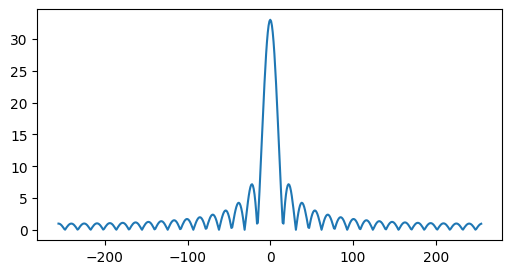

In [154]:
plt.figure(figsize=(6, 3))
plt.plot(kc,abs(W1c)) # Transformada de Rectangular 33, centrada
plt.show()

In [155]:
picosw1=signal.find_peaks(abs(W1c))
print(picosw1)

(array([ 16,  31,  47,  62,  78,  93, 109, 124, 140, 155, 171, 187, 202,
       218, 234, 256, 278, 294, 310, 325, 341, 357, 372, 388, 403, 419,
       434, 450, 465, 481, 496], dtype=int64), {})


In [156]:
lugares_picosw1 = picosw1[0]
altura_de_los_picos=abs(W1c[lugares_picosw1])
print(altura_de_los_picos)

[ 1.          1.01834824  1.03866048  1.07691777  1.12242918  1.18807518
  1.27055244  1.3803284   1.52684005  1.7209115   2.00254448  2.40069245
  3.0682033   4.27295725  7.18510462 33.          7.18510462  4.27295725
  3.0682033   2.40069245  2.00254448  1.7209115   1.52684005  1.3803284
  1.27055244  1.18807518  1.12242918  1.07691777  1.03866048  1.01834824
  1.        ]


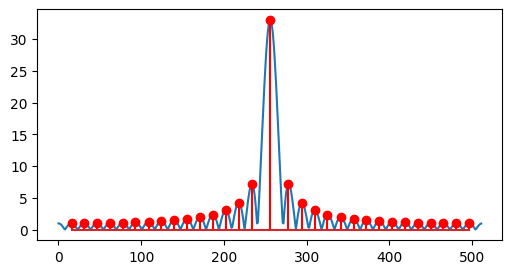

In [157]:
plt.figure(figsize=(6, 3))
plt.plot(abs(W1c))#Transformada de Rectangular 33
plt.stem(lugares_picosw1,altura_de_los_picos, 'r')
plt.show()

In [158]:
#sort ordena de manera ascendente
picordw1= np.sort(abs(W1c[lugares_picosw1])) #alturas ordenadas
print(picordw1)

[ 1.          1.          1.01834824  1.01834824  1.03866048  1.03866048
  1.07691777  1.07691777  1.12242918  1.12242918  1.18807518  1.18807518
  1.27055244  1.27055244  1.3803284   1.3803284   1.52684005  1.52684005
  1.7209115   1.7209115   2.00254448  2.00254448  2.40069245  2.40069245
  3.0682033   3.0682033   4.27295725  4.27295725  7.18510462  7.18510462
 33.        ]


In [159]:
#como queremos la altura máxima de los picos laterales
AMLLrect33=picordw1[-2]
print(AMLLrect33)

7.185104624364864


## **Transformada de Fourier a tiempo corto de una señal** ⛱ 

**$STFT(x,h,t,w)=DFT(x.h_t)(w)$**


**p/c t**(tiempo): es la Transf de Fourier de x por la ventana centrada en t 

**Señal compleja que depende de la frecuencia w**

El Espectrograma de una señal es el módulo al cuadrado de la STFT (ver pág 121 apunte), también función de t y w:

**$Espectrograma_x(t,w)=|STFT(x,t,w)|^2=|DFT(x.h_t)(w)|^2$**

### **En el lab Discreta**

En el lab usaremos DFT.N,
que está en función de las frecuencias fundamentales $k = 0, ..., N-1 $ (que pasaremos a frecuencia en Hertz)

**$STFT(x,h,t,k)=DFT(x.h_t)(k)$**

**$Espectrograma_x(t,k)=|STFT(x,t,k)|^2=|DFT(x.h_t)(w)|^2$**

### Frec en Hertz y Nyquist

Pasaremos la frecuencias fundamentales de la DFT a Hertz:
usaremos regla de 3 simple para que sea más simple... ✊ 💯
Consideramos la DFT.N (descomposición en base $s_k$, con k=0,...,N-1)


k -------- N (muestras) , k oscilaciones en N muestras

fr ------- FrM (FrM muestras=1seg), fr= oscilaciones en 1 segundo  (es la frecuencia en Hertz

luego fr= k*FrM/N es la frecuencia en Hertz, p/k=0,,,,N o centrada, siendo Fr/2 la de Nyquist (para k=N/2)  




In [4]:
N=2000 # si se usa la transformada punto N=2000
k=np.arange(N)
print(k)

kc=np.arange(-N//2,N/2) # k centrado (las dos barras van para pasar el número a entero, es decir saca el resto)
print(kc)
FrM=1000 # si la frecuencia de muestreo es 1000 Hrtz 

fr_Hz=k*FrM/N # en Hz de 0 a Fr1, en [0,Fr1)
print(fr_Hz)
fr_Hz_centrada=kc*FrM/N # en Hz de [-Fr1/2,Fr1/2), con N muestras, Fr1/2=frec de Nyquist
print(fr_Hz_centrada)

[   0    1    2 ... 1997 1998 1999]
[-1000.  -999.  -998. ...   997.   998.   999.]
[0.000e+00 5.000e-01 1.000e+00 ... 9.985e+02 9.990e+02 9.995e+02]
[-500.  -499.5 -499.  ...  498.5  499.   499.5]


## Ejercicio 3: Chirp Lineal

a) Genere la **señal NO estacionaria** Chirp Lineal: Señal oscilante con frec de oscilación creciente de manera lineal 


tiempo en [0,2) muestreado con 2000 muestras:


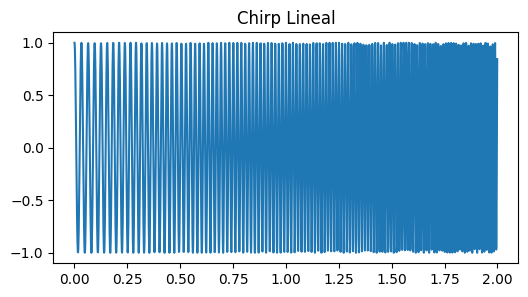

In [161]:
t = np.arange(0,2, 0.001) #tiempo con 1000 Hz frec de muestreo (Período 0.001s) => vector de tiempos discretizados
# el t va del 0 al 2 con un paso de 0.001 para hacer 1000xsegundo
print('tiempo en [0,2) muestreado con', len(t),'muestras:')
C1=signal.chirp(t,30,1,60) #frec inicial 30Hz y 60Hz al segundo -> aumenta de forma lineal
# primer argumento: t
# segundo: frecuencia de oscilacion de arranque -> yo lo defino
# tercero: cuando t=1 va a tener 60 oscilaciones por segundo
# las frecuencias van creciendo linealmente cada 30
plt.figure(figsize=(6, 3))
plt.plot(t,C1)
plt.title('Chirp Lineal')
plt.show()

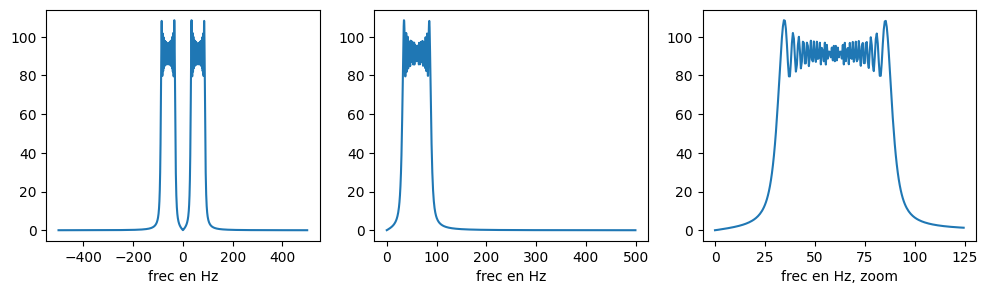

In [162]:
N=2000 
TFC1=fft(C1,N)

kc=np.arange(-N/2,N/2)
FrM=1000 # frec de muestreo 1000 Hz 
fr_Hz_centrada=kc*FrM/N #en Hz [-Fr1/2,Fr1/2), N muestras, Fr1/2=frec de Nyquist

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.plot(fr_Hz_centrada,fftshift(abs(TFC1)))
plt.xlabel('frec en Hz')

fr_Hz=np.arange(0,N/2)*FrM/N #en Hz [0,Fr1/2), N/2 muestras
plt.subplot(132)
plt.plot(fr_Hz,abs(TFC1[0:N//2]))
plt.xlabel('frec en Hz')

fr_Hz=np.arange(0,N/2)*FrM/N #en Hz [0,Fr1/2), N/2 muestras
plt.subplot(133)
plt.plot(fr_Hz[0:250],abs(TFC1[0:250]))
plt.xlabel('frec en Hz, zoom')
plt.show()



b) STFT, Espectrograma
Analice la señal del item anterior con la STFT mirando su Espectrograma utilizando la DFT punto N=Cantidad de muestras de la señal, la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una. (cuatro análisis en total)


In [163]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

In [164]:
h33=signal.hamming(33)
h501=signal.hamming(501)
f1, t1, Sxx1 = signal.spectrogram(C1,fs=FrM, window=h33,nfft=N, noverlap=None) #espectograma sin solape
# Sxx es la transformada de Fourier
f2, t2, Sxx2 = signal.spectrogram(C1,fs=FrM, window=h501, nfft=N, noverlap=None) # espectrograma sin solape

In [165]:
print(f1.shape, t1.shape, Sxx1.shape)
print(f2.shape, t2.shape, Sxx2.shape)

# shape de Sxx1 es de 1001x68 (filas x columnas) donde cada posicion de esta matriz es una transformada de fourier.
# toda una columna es una transfromada de fouerier en un instante de tiempo => tengo 68 transformadas con 1001 valores cada una
# es como decir que tengo 68 vectores de longitud 1000, estos vectores representan la transformada
# dividimos los 2 segundos de senal en 68 intervalos y le calculamos la transformada a cada

(1001,) (68,) (1001, 68)
(1001,) (4,) (1001, 4)


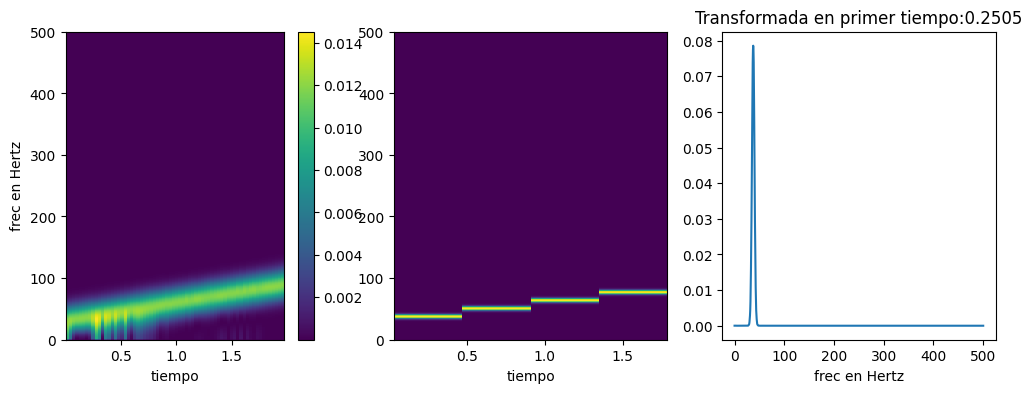

In [166]:
# colores mas calientes son valores mas altos de la transformada (mas energia)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.pcolormesh(t1, f1, Sxx1)
plt.xlabel('tiempo')
plt.ylabel('frec en Hertz')
plt.colorbar()# la altura de z se representa con un color->mapa de color/calor 
plt.subplot(132)
plt.pcolormesh(t2, f2, Sxx2)
plt.xlabel('tiempo')
#plt.colorbar()

plt.subplot(133)
plt.plot(f2, Sxx2[:,0]) #col 0, Transformada en el primer tiempo
plt.xlabel('frec en Hertz')
plt.title('Transformada en primer tiempo:'+str(t2[0]))

plt.show()

* La diferencia entre los dos graficos, a pesar de que es la transformada de la misma señal, es que se usaron ventanas distintas de frecuencia => resoluciones distintas
* El delta-t es el mismo para ambas senales (se tiene que cumplir el principio de incertidumbre)
* No es una senal estacionaria porque las bandas no son constantes en el tiempo (si fuera recta en el eje y si seria estacionaria)

### Ahora procedemos a hacer el analisis con una ventana rectangular en vez de una ventana de Hamming

(recordar que la senal rectangular en frecuencia tiene problemas porque tiene derrames que dificultan en calculo)

In [167]:
r33=np.ones(33) #rectangular
r501=np.ones(501) #rectangular
f3, t3, Sxx3 = signal.spectrogram(C1,fs=FrM, window=r33,nfft=N, noverlap=None) #espectograma sin solape
f4, t4, Sxx4 = signal.spectrogram(C1,fs=FrM, window=r501, nfft=N, noverlap=None) #

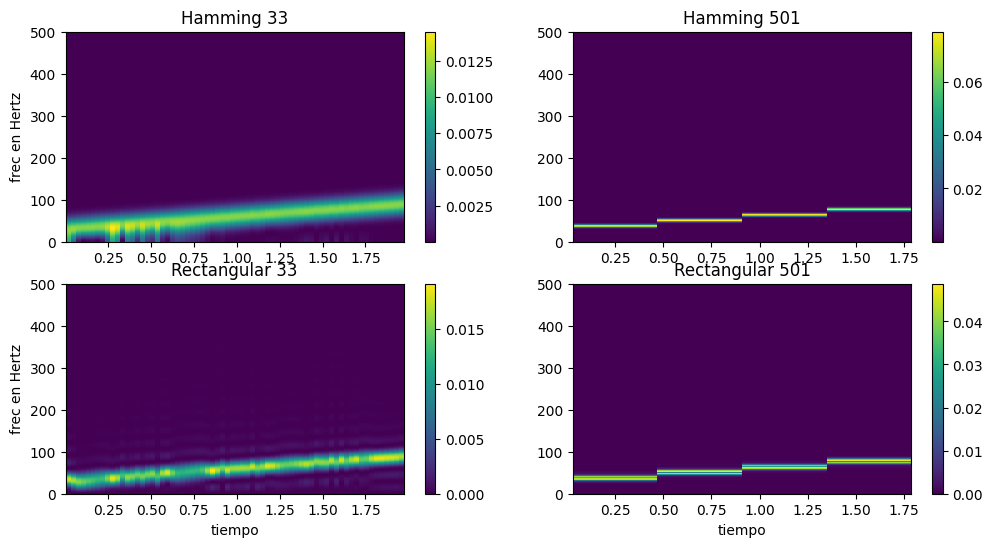

In [168]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.pcolormesh(t1, f1, Sxx1)
plt.title ('Hamming 33')

plt.ylabel('frec en Hertz')
plt.colorbar()# la altura de z se representa con un color->mapa de color/calor 
plt.subplot(222)
plt.pcolormesh(t2, f2, Sxx2)
plt.title ('Hamming 501')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(t3, f3, Sxx3)
plt.xlabel('tiempo')
plt.ylabel('frec en Hertz')
plt.title ('Rectangular 33')
plt.colorbar()# la altura de z se representa con un color->mapa de color/calor 
plt.subplot(224)
plt.pcolormesh(t4, f4, Sxx4)
plt.xlabel('tiempo')
plt.title ('Rectangular 501')
plt.colorbar()
plt.show()

Podemos observar como se ven los derrames (lineas rectas paralelas a la franja de frecuencia principal)

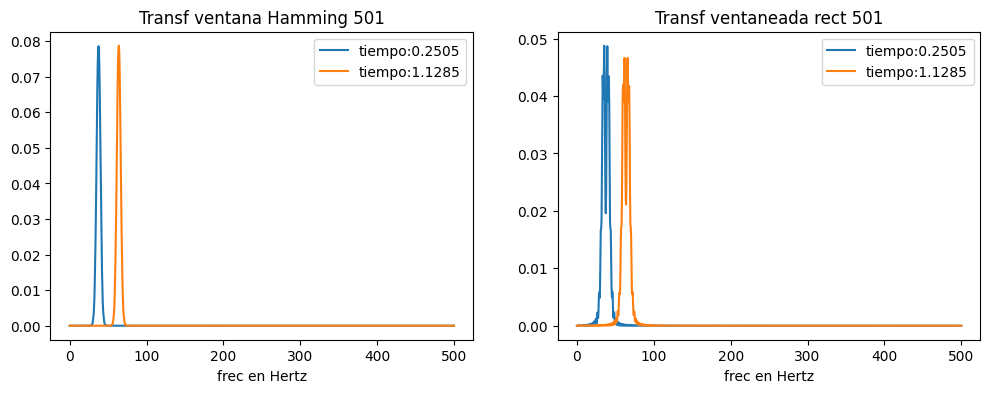

In [169]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(f2, Sxx2[:,0]) #col 0, Transformada en el primer tiempo
plt.xlabel('frec en Hertz')
plt.title('Transf ventana Hamming 501')
plt.plot(f2, Sxx2[:,2]) #col 2, Transformada en el tercer tiempo
plt.legend(('tiempo:'+str(t2[0]),'tiempo:'+str(t2[2])))

plt.subplot(122)
plt.plot(f4, Sxx4[:,0]) #col 0, Transformada en el primer tiempo
plt.xlabel('frec en Hertz')
plt.title('Transf ventaneada rect 501')
plt.plot(f4, Sxx4[:,2]) #col 2, Transformada en el tercer tiempo
plt.legend(('tiempo:'+str(t4[0]),'tiempo:'+str(t4[2])))
plt.show()

Hamming me da mucha mas resolucion

## Ejercicio 4: Audio

a) Considere la **señal NO estacionaria** de audio: 'audio2.wav', extraiga la Frecuencia de muestreo, la cantidad de muestras y la duración de la señal. Grafique la señal en función del tiempo.


In [170]:
au2=read('./Tareas/AudiosT02/audio1.wav')
print (au2) #terna
A2=au2[1] #vector de datos, arreglo numpy
A2l = A2[:,0]

A2 = A2l
print (A2l)

(44100, array([[ -31,  -33],
       [ -31,  -34],
       [ -33,  -35],
       ...,
       [-291, -274],
       [-293, -271],
       [-279, -264]], dtype=int16))
[ -31  -31  -33 ... -291 -293 -279]


In [171]:
CM= len(A2) #cantidad de muestras de la señal (vector de datos)
FrM=au2[0] #frecuencia de muestereo en Hertz (Fr muestras por segundo)
TA=CM/FrM
P=1/FrM #período de muestreo, long del intervalo entre muestra y muestra en segundos
print('la señal de audio dura', TA, 'segundos')
print('la señal se grabó tomando muestras cada', P, 'segundos')


la señal de audio dura 10.329319727891157 segundos
la señal se grabó tomando muestras cada 2.2675736961451248e-05 segundos


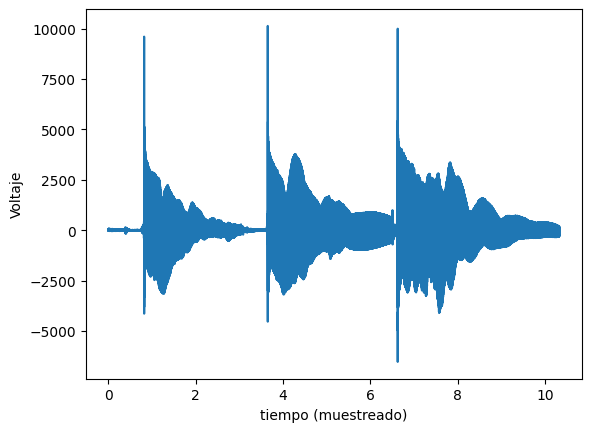

In [172]:
t=np.arange(CM)/FrM #vector de tiempos discreto:
plt.plot(t,A2)
plt.xlabel('tiempo (muestreado)')
plt.ylabel('Voltaje')
plt.show()

###b) STFT, Espectrograma
Analice la señal del item anterior con la STFT mirando su Espectrograma utilizando la DFT punto N=Cantidad de muestras de la señal, la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una. (cuatro análisis en total)


In [173]:
N=CM # cantidad de muestras
h333=signal.hamming(333) #la señal A2 tiene más muestras que C1, hay que elegir ventanas más grandes porque si no va a estar calculando hastan manana
h2001=signal.hamming(2001)
f1, t1, Sxx1 = signal.spectrogram(A2,fs=FrM, window=h333,nfft=N, noverlap=None) #espectograma sin solape
f2, t2, Sxx2 = signal.spectrogram(A2,fs=FrM, window=h2001, nfft=N, noverlap=None) # espectrograma sin solape

# el solape es en el tiempo

In [ ]:
print(f1.shape, t1.shape, Sxx1.shape)
print(f2.shape, t2.shape, Sxx2.shape)

(46561,) (318,) (46561, 318)
(46561,) (53,) (46561, 53)


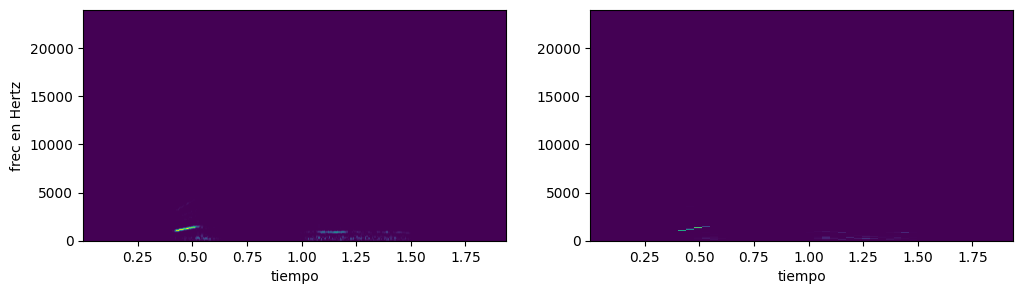

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.pcolormesh(t1, f1, Sxx1)
plt.xlabel('tiempo')
plt.ylabel('frec en Hertz')
#plt.colorbar()# la altura de z se representa con un color->mapa de color/calor 
plt.subplot(122)
plt.pcolormesh(t2, f2, Sxx2)
plt.xlabel('tiempo')
#plt.colorbar()
plt.show()

## Bonus: Chirp Cuadrático

a) Ejercicio para la casa. Genere la **señal NO estacionaria** Chirp Cuadrático: Señal oscilante con frec de oscilación creciente de manera cuadrática 


tiempo en [0,2) muestreado con 2000 muestras:


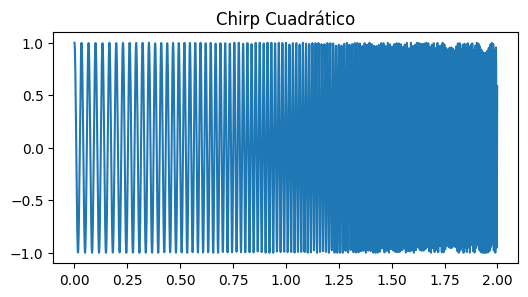

In [ ]:
t = np.arange(0,2, 0.001) #tiempo en [0,2) con 1000 Hz frec de muestreo (Período 0.001s)
print('tiempo en [0,2) muestreado con', len(t),'muestras:')

C2=signal.chirp(t,30,1,60,'q') #frec inicial 30Hz y 60Hz al segundo
plt.figure(figsize=(6, 3))
plt.plot(t,C2)
plt.title('Chirp Cuadrático')
plt.show()

###b) STFT, Espectrograma
Analice la señal del item anterior con la STFT mirando su Espectrograma utilizando la DFT punto N=Cantidad de muestras de la señal, la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una. (cuatro análisis en total)
